In [ ]:
"""

Proyecto Data Science II: Evaluación del Riesgo Crediticio Utilizando Aprendizaje Automático
Maritza Quintero Siritt

Resumen
El proyecto se centra en analizar datos históricos sobre préstamos, incluyendo información sobre el género del prestatario, 
el propósito y tipo del préstamo, y características financieras relevantes. El objetivo es desarrollar un modelo predictivo utilizando técnicas 
de Aprendizaje Automático para evaluar la probabilidad de incumplimiento de préstamos. Este análisis ayudará a las instituciones financieras a 
mitigar los riesgos asociados con la concesión de préstamos, optimizar su cartera y reducir la tasa de incumplimiento, mejorando la toma de decisiones 
financieras informadas.

Objetivo del Proyecto
El objetivo principal del proyecto es desarrollar un modelo de Aprendizaje Automático que pueda predecir con alta precisión si un préstamo será pagado 
o incumplido. Esto permitirá a las instituciones financieras evaluar mejor el riesgo crediticio, reducir pérdidas asociadas con préstamos incobrables 
y tomar decisiones más informadas sobre la concesión de créditos.

Audiencia 
La audiencia objetivo son gerentes de riesgo financiero, analistas de datos y ejecutivos de instituciones financieras.

Contexto Comercial
La concesión de préstamos es una fuente clave de ingresos para las instituciones financieras, pero también conlleva un riesgo significativo: el 
incumplimiento de pagos por parte de los prestatarios. La gestión del riesgo crediticio es crucial para la rentabilidad y estabilidad de las 
instituciones prestamistas. Mediante el desarrollo de un modelo predictivo basado en datos históricos de prestatarios y características de los 
préstamos, se espera mejorar la capacidad de las instituciones para identificar riesgos antes de la aprobación del préstamo, optimizar su cartera y 
reducir la tasa de incumplimiento, lo cual fortalece la confianza de los inversores y los clientes.

Hipótesis a Responder
¿Podemos predecir si un cliente incumplirá con el pago de un préstamo basado en sus características financieras y del préstamo?
Se plantea que, al analizar los atributos de los préstamos, tales como el monto, tipo, propósito del préstamo, y la solvencia crediticia del prestatario,
junto con otros factores relevantes, se podrá desarrollar un modelo de Aprendizaje Automático capaz de predecir con alta precisión si un prestatario 
incumplirá con su préstamo. Este modelo proporcionará información valiosa para la toma de decisiones estratégicas, mejorando la capacidad de la 
institución financiera para evaluar la rentabilidad y el riesgo crediticio de manera más eficiente.

Las variables relevantes para el riesgo incluyen el "Status" del préstamo, que indica si un préstamo ha sido pagado puntualmente (1) o ha entrado en 
incumplimiento (0). El análisis de esta variable permitirá al modelo centrarse en los factores que determinan el cumplimiento o el incumplimiento, 
proporcionando así un enfoque sólido para la mitigación del riesgo crediticio.


Fuente de datos: https://www.kaggle.com/datasets/yasserh/loan-default-dataset

"""


In [ ]:
#Conexión con Kaggle mediante API

In [1]:
!pip install kaggle

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
# Verificar si el archivo existe en la ruta
kaggle_json_path = os.path.join(os.getcwd(), 'kaggle.json')
if os.path.exists(kaggle_json_path):     
 print(f"Archivo kaggle.json encontrado en: {kaggle_json_path}")
else:     
 print("No se encontró el archivo kaggle.json en el directorio actual.")

Archivo kaggle.json encontrado en: C:\Users\Mary Siritt\Phyton CoderHouse\kaggle.json


In [4]:
# Configura la variable de entorno para que apunte a la carpeta donde está el archivo kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\Mary Siritt\Phyton CoderHouse"
 
# Inicializa la API y autentica
api = KaggleApi()
api.authenticate()
 
# Definir el dataset que quieres descargar (puedes ajustar esto según el dataset que quieras)
dataset = 'yasserh/loan-default-dataset'
 
# Definir el directorio de descarga de los archivos
download_path = r"C:\Users\Mary Siritt\Phyton CoderHouse"
 
# Crear la carpeta de descarga si no existe
os.makedirs(download_path, exist_ok=True)
 
# Descargar el dataset y descomprimirlo
api.dataset_download_files(dataset, path=download_path, unzip=True)
 
# Verificar los archivos descargados
print("Archivos descargados:", os.listdir(download_path))

Dataset URL: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
Archivos descargados: ['.git', '.ipynb_checkpoints', 'kaggle.json', 'Loan_Default.csv', 'Loan_Default.rar', 'ProyectoDataScienceII_Parte1_QuinteroSiritt.ipynb', 'ProyectoDataScienceII_Parte2_QuinteroSiritt.ipynb', 'ProyectoDS_Parte1_QuinteroSiritt.ipynb', 'ProyectoDS_Parte2_QuinteroSiritt.ipynb', 'Untitled.ipynb']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Descargar el conjunto de datos
api.dataset_download_files(dataset, path=download_path, unzip=True)
 
# Verificar el contenido del directorio de descarga
print("Archivos descargados:", os.listdir(download_path))
 
# Cargar el archivo
csv_file_path = os.path.join(download_path, 'Loan_Default.csv')
 
# Cargar el conjunto de datos en un DataFrame
df_loan = pd.read_csv(csv_file_path)
 
# Mostrar las primeras filas del DataFrame
print(df_loan.head())

Dataset URL: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
Archivos descargados: ['.git', '.ipynb_checkpoints', 'kaggle.json', 'Loan_Default.csv', 'Loan_Default.rar', 'ProyectoDataScienceII_Parte1_QuinteroSiritt.ipynb', 'ProyectoDataScienceII_Parte2_QuinteroSiritt.ipynb', 'ProyectoDS_Parte1_QuinteroSiritt.ipynb', 'ProyectoDS_Parte2_QuinteroSiritt.ipynb', 'Untitled.ipynb']
      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1           

In [ ]:
#Exploración de datos

In [7]:
#Información general del DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
#El dataset muestra pocos valores nulos en las columnas, una mezcla de datos numéricos y categóricos, lo cual 
#requerirá diferentes técnicas de preprocesamiento, como la codificación de variables categóricas.

In [8]:
# Resumen estadístico
df_loan.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
# Las medias y desviaciones estándar proporcionan una idea de la tendencia central y la dispersión de los datos, 
# los cuales serán útiles para la normalización y estandarización de variables durante el preprocesamiento.

In [9]:
# Verificar la cantidad de datos en el DataFrame
total_entries = df_loan.shape[0]
print("Total de entradas en el DataFrame:", total_entries)

Total de entradas en el DataFrame: 148670


In [ ]:
#El DataFrame: 148,670 tiene filas de datos

In [10]:
# Verificar duplicados en el DataFrame
duplicate_entries = df_loan.duplicated().sum()
print("Número de entradas duplicadas:", duplicate_entries)

Número de entradas duplicadas: 0


In [ ]:
#No se encontraron duplicados.
#Se considera positivo debido a que los duplicados pueden distorsionar el análisis y los resultados del modelo.

In [11]:
# Obtener los nombres de las columnas
column_names = df_loan.columns
print("Nombres de las columnas:", column_names)

Nombres de las columnas: Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


In [ ]:
#El conjunto de datos contiene varias columnas relacionadas con préstamos, como detalles del préstamo, demografía del prestatario, 
#puntajes de crédito y estados del préstamo. Aquí hay una breve descripción de las columnas y los datos que contienen:

#1.	ID: Identificador único para cada préstamo.
#2.	year: Año de la solicitud de préstamo.
#3.	loan_limit: Categoría del límite del préstamo.
#4.	Gender: Género del solicitante.
#5.	approv_in_adv: Indica si el préstamo fue preaprobado.
#6.	loan_type: Tipo de préstamo.
#7.	loan_purpose: Propósito del préstamo.
#8.	Credit_Worthiness: Categoría de solvencia crediticia.
#9.	open_credit: Estado de crédito abierto.
#10. business_or_commercial: Indica si el préstamo es para fines comerciales o de negocio.
#11. loan_amount: Monto del préstamo.
#12. rate_of_interest: Tasa de interés.
#13. Interest_rate_spread: Diferencial de la tasa de interés.
#14. Upfront_charges: Cargos iniciales.
#15. term: Plazo del préstamo en meses.
#16. Neg_ammortization: Indica si hay amortización negativa.
#17. interest_only: Indica si es solo interés.
#18. lump_sum_payment: Indica si hay pago de suma global.
#19. property_value: Valor de la propiedad.
#20. construction_type: Tipo de construcción.
#21. occupancy_type: Tipo de ocupación.
#22. Secured_by: Garantía del préstamo.
#23. total_units: Unidades totales.
#24. income: Ingreso del solicitante.
#25. credit_type: Tipo de crédito.
#26. Credit_Score: Puntaje de crédito del solicitante.
#27. co-applicant_credit_type: Tipo de crédito del co-solicitante.
#28. age: Rango de edad del solicitante.
#29. submission_of_application: Tipo de presentación de la solicitud.
#30. LTV: Relación préstamo-valor (Loan-to-Value ratio).
#31. Region: Región del solicitante.
#32. Security_Type: Tipo de garantía del préstamo.
#33. Status: Estado del préstamo (por ejemplo, incumplido o no).
#34. dtir1: Relación deuda-ingreso (Debt-to-Income ratio).

#Cada columna contiene datos que describen diferentes aspectos del préstamo y del solicitante, permitiendo un análisis integral para evaluar riesgos 
#y tomar decisiones financieras.

In [12]:
# Verificar los valores nulos en cada columna
missing_values = df_loan.isnull().sum()
print("\nValores nulos en el DataFrame:")
print(missing_values[missing_values > 0])


Valores nulos en el DataFrame:
loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64


In [ ]:
#Se encuentran una cantidad considerable de valores nulos, se procede a evaluar el impacto de los mismos antes de considerar eliminarlos.

In [13]:
# Verificar cuántas filas tienen valores nulos en alguna columna
rows_with_missing = df_loan.isnull().any(axis=1).sum()
total_rows = df_loan.shape[0]
 
# Porcentaje de filas que se eliminarían
percent_rows_with_missing = (rows_with_missing / total_rows) * 100
 
print(f"Total de filas con valores nulos: {rows_with_missing}")
print(f"Porcentaje de filas que se eliminarían: {percent_rows_with_missing:.2f}%")

Total de filas con valores nulos: 50483
Porcentaje de filas que se eliminarían: 33.96%


In [ ]:
# Dado que aproximadamente el 33.96% de las filas tienen algún valor nulo, eliminar todas estas filas podría ser demasiado costoso en
# términos de pérdida de datos. Eliminar más de un tercio del dataset podría llevar a una muestra menos representativa y afectar el
# rendimiento de los modelos de machine learning al reducir la cantidad de información disponible.
# Antes de continuar con la verificación de los valores nulos, realizaremos unas visualizaciones para evaluar el comportamiento.

In [ ]:
#Visualización de la distribución de variables clave

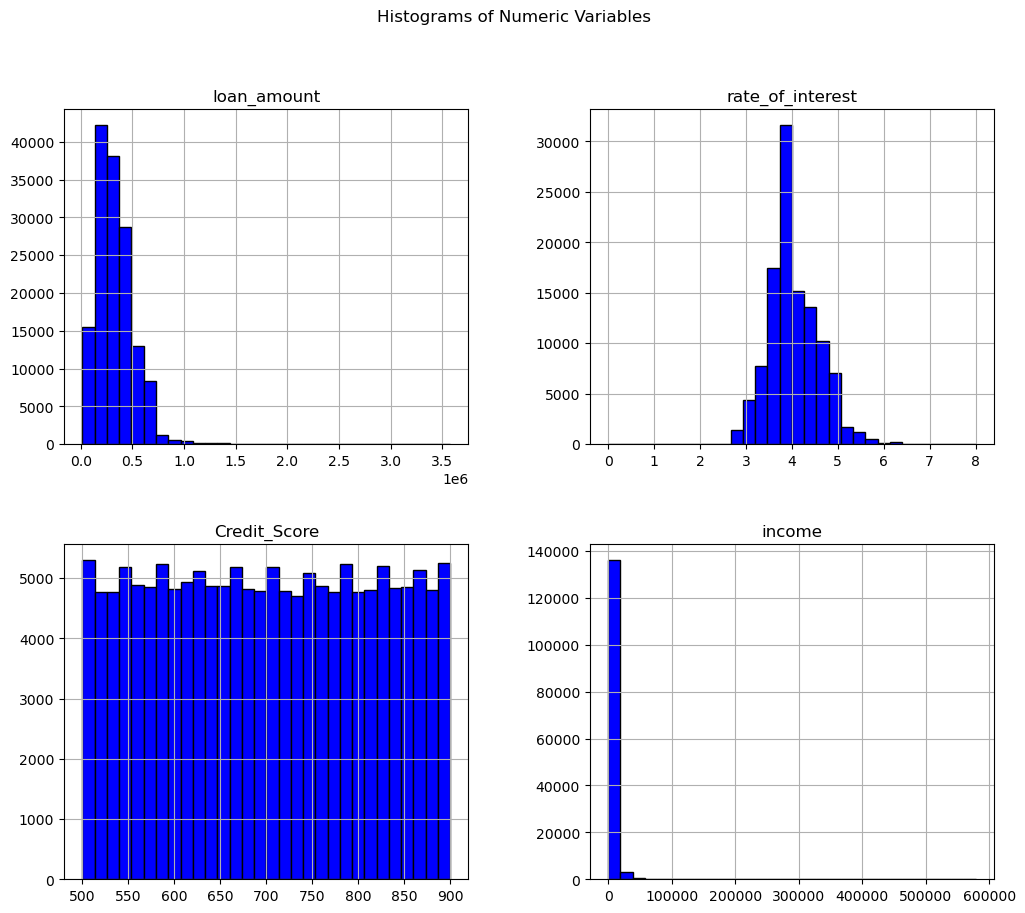

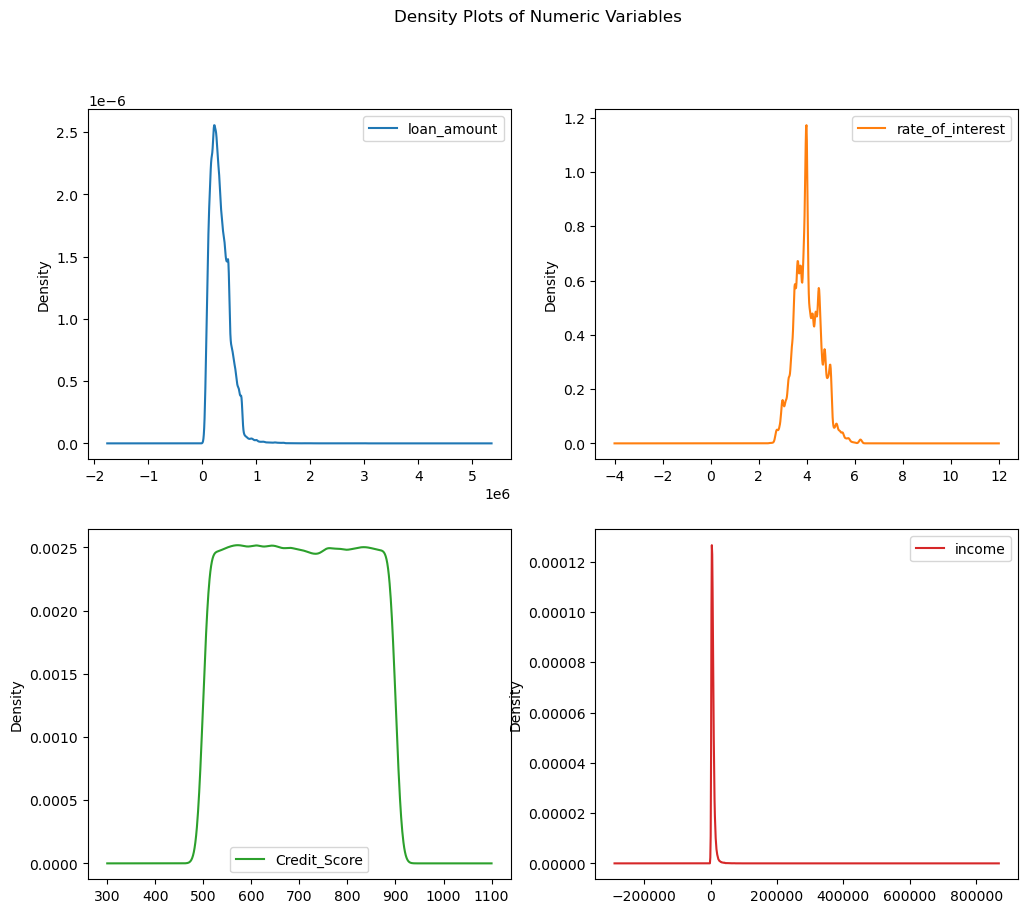

In [14]:
#Variables numéricas para visualizar
numeric_columns = ['loan_amount', 'rate_of_interest', 'Credit_Score', 'income']

#Histogramas
df_loan[numeric_columns].hist(bins=30, figsize=(12, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

#Gráficos de densidad
df_loan[numeric_columns].plot(kind='density', subplots=True, layout=(2, 2), sharex=False, figsize=(12, 10))
plt.suptitle('Density Plots of Numeric Variables')
plt.show()

In [ ]:
#loan_amount: En su histograma, muestra que la mayoría de los préstamos están por debajo de $500,000. La distribución está 
#sesgada a la derecha, lo que sugiere que aunque la mayoría de los préstamos son relativamente pequeños, hay algunos préstamos 
#grandes que influyen en la media. Y en su gráfico de densidad, la distribución está sesgada a la derecha, similar a lo observado 
#en el histograma.

#rate_of_interest: Muestra en su histograma, La distribución es aproximadamente normal con un pico claro, 
#lo que indica que las tasas de interés suelen centrarse en torno al 4%. Con un gráfico de densidad aunque hay un pico 
#alrededor del 4%, la densidad muestra variabilidad. Esto puede ser debido a datos más detallados en ciertas regiones de tasas de interés.

#Credit_Score: Tiene un histograma, donde la mayoría no hay un pico claro en la distribución, lo que sugiere que los puntajes 
#de crédito están distribuidos de manera bastante uniforme dentro de este rango.
#Muestra en su gráfico de densidad, una confirmacion de la observación del histograma de que los puntajes de crédito están distribuidos 
#de manera uniforme en este rango.

#income: Su histograma, indica que la distribución está fuertemente sesgada a la derecha, indicando que la mayoría de los 
#prestatarios tienen ingresos relativamente bajos, pero hay algunos con ingresos extremadamente altos. Y en su gráfico de densidad, 
#la distribución está fuertemente sesgada a la derecha, similar a lo observado en el histograma.

In [ ]:
#Análisis de correlación

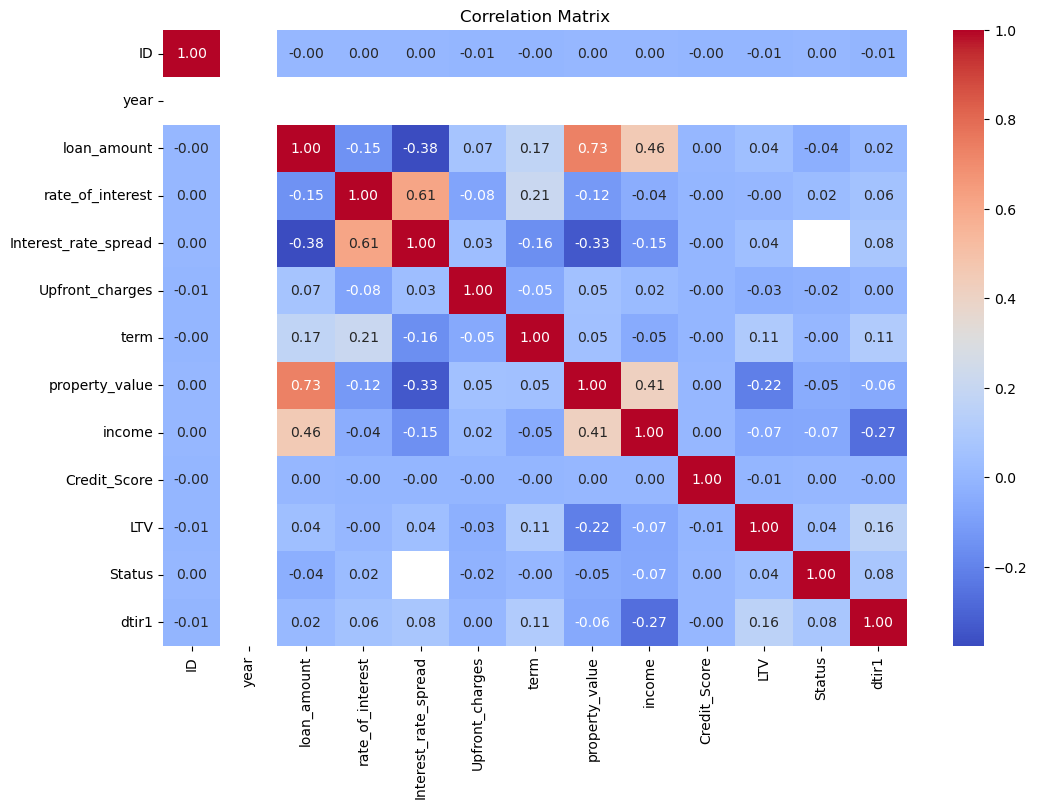

In [15]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_loan.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df_loan[numeric_columns].corr()

# Visualización de la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#La fuerte relación positiva entre loan_amount y property_value sugiere que el valor de la propiedad es un factor importante para 
#determinar el monto del préstamo. La relación entre rate_of_interest y Interest_rate_spread indica que a medida que aumenta la tasa 
#de interés, la variabilidad en la tasa también aumenta. Las relaciones moderadas entre loan_amount e income, así como entre property_value 
#e income, sugieren que los ingresos son un factor relevante, aunque no determinante, para el valor del préstamo y de la propiedad.
#La falta de una fuerte correlación lineal entre Status y las demás variables indica que la predicción de la variable objetivo puede 
#requerir un enfoque más completo.

In [ ]:
#Identificación de valores atípicos

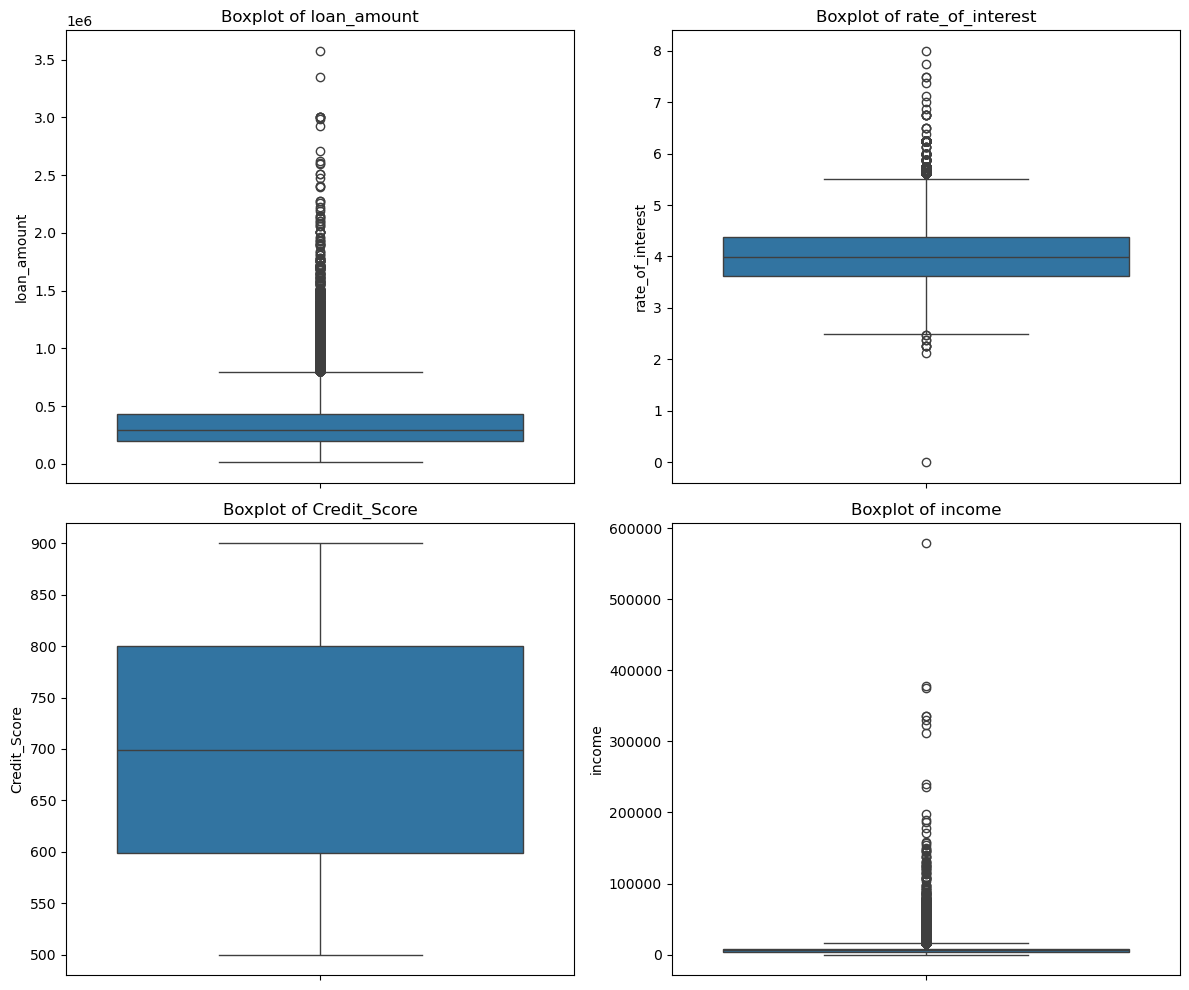

In [16]:
import math

# Seleccionar solo las columnas numéricas relevantes
numeric_columns = ['loan_amount', 'rate_of_interest', 'Credit_Score', 'income']

# Calcular el número de filas y columnas para los subplots
num_cols = len(numeric_columns)
num_rows = math.ceil(num_cols / 2)

# Boxplots para identificar valores atípicos
plt.figure(figsize=(12, num_rows * 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(df_loan[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
#loan_amount: Los valores atípicos indican que aunque la mayoría de los préstamos son relativamente pequeños, hay unos pocos préstamos 
#significativamente grandes que podrían influir en la media y otras estadísticas.
#rate_of_interest: Los valores atípicos en las tasas de interés sugieren que hay algunas tasas de interés inusualmente altas y bajas 
#que podrían ser el resultado de políticas de préstamos específicas o errores en los datos.
#Credit_Score: La distribución del puntaje de crédito es bastante uniforme, sin valores atípicos significativos que deban ser abordados.
#income:Los valores atípicos en los ingresos indican que aunque la mayoría de los prestatarios tienen ingresos relativamente bajos, 
#hay algunos con ingresos extremadamente altos que podrían influir en la media y otras estadísticas.

In [ ]:
#Preprocesamiento de datos

In [ ]:
#Manejo de Valores Nulos 
#Dado que algunas columnas como rate_of_interest, Interest_rate_spread, income y Upfront_charges tienen un alto porcentaje de valores
# nulos, eliminar todas las filas que contienen nulos podría reducir demasiado el tamaño del dataset. Ya que estan relacionadas
# con el status, por lo cual, para mantener el analisis, se reemplazan los nulos por la media.

In [17]:
# Reemplazar valores nulos en 'rate_of_interest' con la media
df_loan['rate_of_interest'].fillna(df_loan['rate_of_interest'].mean(), inplace=True)
 
# Reemplazar valores nulos en 'Interest_rate_spread' con la media
df_loan['Interest_rate_spread'].fillna(df_loan['Interest_rate_spread'].mean(), inplace=True)
 
# Reemplazar valores nulos en 'income' con la media
df_loan['income'].fillna(df_loan['income'].mean(), inplace=True)
 
# Reemplazar valores nulos en 'Upfront_charges' con la media
df_loan['Upfront_charges'].fillna(df_loan['Upfront_charges'].mean(), inplace=True)
 
# Verificar si quedan valores nulos en estas columnas
print(df_loan[['rate_of_interest', 'Interest_rate_spread', 'income', 'Upfront_charges']].isnull().sum())

rate_of_interest        0
Interest_rate_spread    0
income                  0
Upfront_charges         0
dtype: int64


In [18]:
#Valores unicos de la columna Status
df_loan['Status'].unique()

array([1, 0], dtype=int64)

In [ ]:
#Verificacion de correlacion entre valores nulos

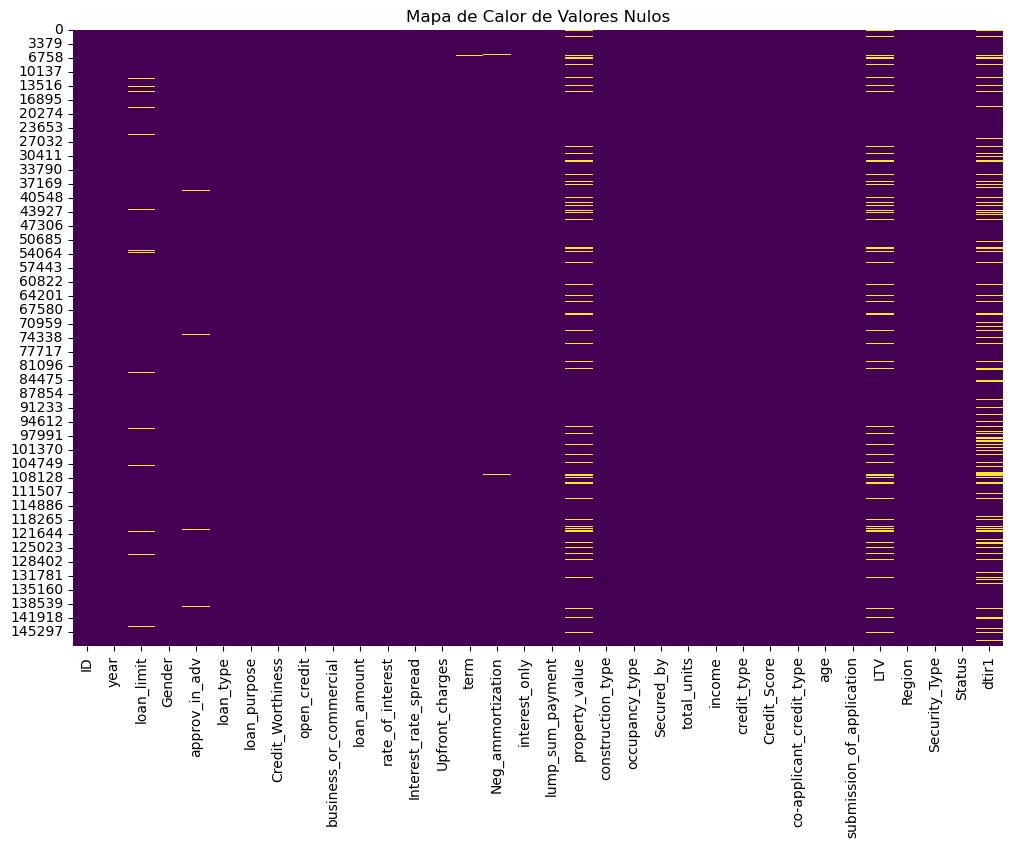

In [19]:
# Visualizar los valores nulos en un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_loan.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

In [ ]:
# Se observa una distribución esporádica de nulos, la mayoría de los valores nulos están dispersos de manera esporádica en diferentes
# filas del dataset, sin embargo, en las columnas property_value, LTV y dtir1 hay muchos nulos.

In [20]:
# Eliminar todas las filas que contengan valores nulos
df_loan.dropna(inplace=True)
 
# Verificar que no queden valores nulos
print("Cantidad de filas después de eliminar los valores nulos:", df_loan.shape[0])
print("\nValores nulos restantes en el DataFrame:")
print(df_loan.isnull().sum())

Cantidad de filas después de eliminar los valores nulos: 120635

Valores nulos restantes en el DataFrame:
ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application 

In [ ]:
#Se eliminaron un total de 120.635 filas

In [ ]:
#Manejo de valores atipicos

In [21]:
# Se eliminan los valores atípicos en las columnas numéricas clave utilizando el método IQR.
 
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
 
# Aplicar la eliminación de valores atípicos a las columnas relevantes
for col in ['loan_amount', 'rate_of_interest', 'income']:
    df_loan = remove_outliers(df_loan, col)

In [ ]:
#Estandarización de Variables Numéricas
#Se estandarizan las columnas numéricas para tener una media de 0 y una desviación estándar de 1.

In [22]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas para estandarización
numeric_columns = ['loan_amount', 'rate_of_interest', 'Credit_Score', 'income', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'LTV', 'dtir1']

# Estandarizar las columnas numéricas
scaler = StandardScaler()
df_loan[numeric_columns] = scaler.fit_transform(df_loan[numeric_columns])

In [ ]:
#Codificación de Variables Categóricas
#Se convirtierten las variables categóricas en variables dummy utilizando pd.get_dummies.

In [23]:
#Identificar columnas categóricas
categorical_columns = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']

#Codificar variables categóricas
df_loan = pd.get_dummies(df_loan, columns=categorical_columns)


In [ ]:
#Análisis descriptivo

In [ ]:
#Describir las variables numericas

In [24]:
# Verificar las estadísticas descriptivas de las columnas numéricas
print(df_loan.describe())

                  ID      year   loan_amount  rate_of_interest  \
count  111764.000000  111764.0  1.117640e+05      1.117640e+05   
mean    99054.157895    2019.0  1.188858e-17     -1.140286e-15   
std     42928.336042       0.0  1.000004e+00      1.000004e+00   
min     24890.000000    2019.0 -1.894065e+00     -2.673232e+00   
25%     61824.750000    2019.0 -7.506134e-01     -6.859919e-01   
50%     98876.500000    2019.0 -1.788876e-01     -3.356803e-02   
75%    136200.250000    2019.0  6.469387e-01      6.940362e-01   
max    173559.000000    2019.0  3.060892e+00      2.626076e+00   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count          1.117640e+05     1.117640e+05  111764.000000    1.117640e+05   
mean           5.213173e-17     1.983549e-17     334.091604    6.834342e-17   
std            1.000004e+00     1.000004e+00      59.340394    1.000004e+00   
min           -3.234864e+00    -1.172786e+00      96.000000   -1.523831e+00   
25%       

In [ ]:
# Las estadísticas descriptivas muestran que las columnas numéricas fueron correctamente estandarizadas. Todas tienen una media cercana
# a 0 y una desviación estándar de 1.

In [ ]:
# Revisar la distribución de algunas variables categóricas codificadas

In [25]:
# Mostrar una muestra de algunas columnas dummy para asegurarse de que fueron codificadas correctamente
print(df_loan[['Gender_Male', 'loan_type_type1', 'loan_type_type2']].head())

   Gender_Male  loan_type_type1  loan_type_type2
0        False             True            False
2         True             True            False
3         True             True            False
4        False             True            False
5        False             True            False


In [ ]:
# Las columnas categóricas como Gender, loan_type, entre otras, fueron correctamente codificadas en variables dummy. El hecho de que
# los valores estén en formato booleano (True/False) sugiere que la codificación se aplicó bien.

In [ ]:
#Verificar si aun existen valores nulos

In [26]:
# Verificar si hay valores nulos restantes
print(df_loan.isnull().sum())

ID                        0
year                      0
loan_amount               0
rate_of_interest          0
Interest_rate_spread      0
                         ..
Region_North-East         0
Region_central            0
Region_south              0
Security_Type_Indriect    0
Security_Type_direct      0
Length: 72, dtype: int64


In [ ]:
# No se detectan valores nulos en ninguna de las columnas. Esto confirma que las transformaciones previas, como la eliminación de nulos, 
# se realizaron correctamente y que el dataset está limpio y listo para análisis adicionales o modelado.

In [ ]:
# Visualizar la distribución de algunas variables estandarizadas

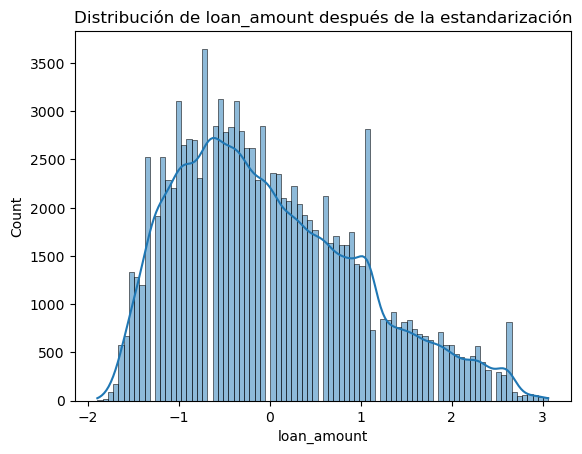

In [27]:
# Visualizar la distribución de una variable estandarizada
sns.histplot(df_loan['loan_amount'], kde=True)
plt.title('Distribución de loan_amount después de la estandarización')
plt.show()

In [ ]:
# La visualización de la distribución de loan_amount después de la estandarización muestra una distribución adecuada con media 0,
# que es lo esperado tras la estandarización.
# La curva KDE parece razonable, con un pico alrededor de 0 y una cola en el lado derecho, lo que refleja una distribución sesgada
# hacia valores más altos.

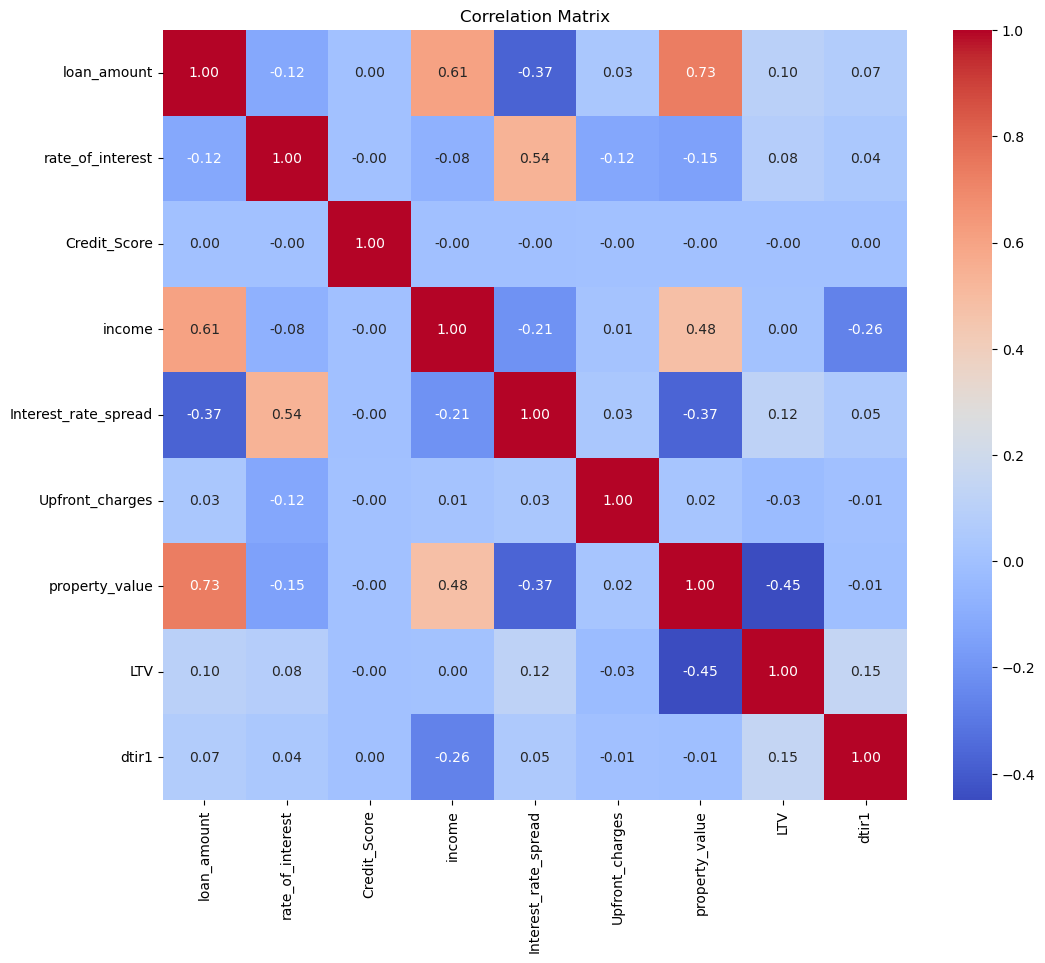

In [28]:
# Matriz de correlación
correlation_matrix = df_loan[numeric_columns].corr()
 
# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Las variables loan_amount y property_value (0.73), tienen una correlación fuerte y positiva entre el monto del préstamo y el valor
# de la propiedad. Esto sugiere que a mayor valor de la propiedad, mayor es el monto del préstamo.
# Las variables, income y loan_amount (0.61), tienen una correlación positiva fuerte entre los ingresos y el monto del préstamo, lo que
# refleja que las personas con mayores ingresos suelen obtener préstamos de mayor monto.
# Hay una correlación moderada entre rate_of_interest y Interest_rate_spread (0.57), la tasa de interés y el spread de la tasa de interés
# también muestran una correlación positiva moderada, lo cual es lógico porque ambos valores están relacionados en términos de costo
# financiero para el prestatario.
# La variable Credit_Score no parece estar correlacionadas significativamente con otras variables del dataset.
# Esto podría significar que el puntaje de crédito no tiene un efecto directo en las otras variables que estás analizando.

In [ ]:
# Ingenieria de atributos

In [ ]:
# Crear nuevas variables

In [29]:
# Ratios y Proporciones
df_loan['loan_to_property_value'] = df_loan['loan_amount'] / df_loan['property_value']
df_loan['income_to_loan_amount'] = df_loan['income'] / df_loan['loan_amount']
df_loan['income_to_rate_of_interest'] = df_loan['income'] / df_loan['rate_of_interest']
 
# Interacciones entre Variables
df_loan['loan_interest_product'] = df_loan['loan_amount'] * df_loan['rate_of_interest']
df_loan['credit_income_product'] = df_loan['Credit_Score'] * df_loan['income']

In [ ]:
# Caracteristicas Binarias y de Categorias

In [30]:
# Crear una variable binaria para ingresos altos
df_loan['high_income'] = df_loan['income'] > df_loan['income'].median()
 
# Categorizar la tasa de interés en grupos
df_loan['rate_of_interest_category'] = pd.cut(df_loan['rate_of_interest'], bins=[0, 3, 5, 7, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
# Limpiar valores negativos o ceros antes de aplicar la transformación logarítmica

In [31]:
# Aplicar transformación logarítmica a algunas variables
df_loan['loan_amount'] = df_loan['loan_amount'].apply(lambda x: x if x > 0 else 1)
df_loan['income'] = df_loan['income'].apply(lambda x: x if x > 0 else 1)
 
# Transformaciones logarítmicas
df_loan['log_loan_amount'] = np.log1p(df_loan['loan_amount'])
df_loan['log_income'] = np.log1p(df_loan['income'])

In [32]:
# Verificar si hay valores nulos en el DataFrame después de las transformaciones
print(df_loan.isnull().sum())

ID                               0
year                             0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread             0
                             ...  
credit_income_product            0
high_income                      0
rate_of_interest_category    71413
log_loan_amount                  0
log_income                       0
Length: 81, dtype: int64


In [33]:
# Reemplazar valores nulos en 'rate_of_interest_category' con la categoría más frecuente
most_frequent_category = df_loan['rate_of_interest_category'].mode()[0]
df_loan['rate_of_interest_category'].fillna(most_frequent_category, inplace=True)
 
# Verificar si quedan valores nulos en 'rate_of_interest_category'
print(df_loan['rate_of_interest_category'].isnull().sum())

0


In [ ]:
#Codificacion de Variables Categoricas

In [34]:
# Codificar las variables categóricas restantes
df_loan = pd.get_dummies(df_loan, columns=['rate_of_interest_category'], drop_first=True)

In [35]:
print(df_loan.columns)

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1', 'loan_limit_cf', 'loan_limit_ncf',
       'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_ho

In [36]:
# Entrenamiento y testeo

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

In [37]:
from sklearn.model_selection import train_test_split
# Definir X (features) e y (target)
X = df_loan.drop('Status', axis=1)
y = df_loan['Status']
 
# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
# Verificar las dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (89411, 82)
Tamaño del conjunto de prueba: (22353, 82)


In [ ]:
# Modelo 1: Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
 
# Definir el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
 
# Entrenar el modelo
rf_model.fit(X_train, y_train)
 
# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)
 
# Evaluar el rendimiento del modelo
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18645
           1       1.00      1.00      1.00      3708

    accuracy                           1.00     22353
   macro avg       1.00      1.00      1.00     22353
weighted avg       1.00      1.00      1.00     22353



In [ ]:
# El modelo tiene una exactitud general del 100%, lo cual es muy inusual y podría ser una señal de que el modelo está sobreajustado,
# o que hay algún tipo de sesgo en los datos. Sin embargo, basándonos en estos resultados, el modelo está funcionando perfectamente
# para este conjunto de datos.

In [ ]:
# Modelo 2: Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
 
# Definir el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
 
# Entrenar el modelo
lr_model.fit(X_train, y_train)
 
# Predecir en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)
 
# Evaluar el rendimiento del modelo
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     18645
           1       1.00      0.29      0.45      3708

    accuracy                           0.88     22353
   macro avg       0.94      0.65      0.69     22353
weighted avg       0.90      0.88      0.85     22353



In [ ]:
# El modelo de Regresión Logística muestra un rendimiento significativamente menor en comparación con el modelo de Random Forest,
# particularmente en la predicción de la clase minoritaria (Status = 1).
# El modelo de Regresión Logística no está manejando bien la clase minoritaria (Status 1). Esto se refleja en el recall bajo
# para esa clase, lo que significa que el modelo no está identificando bien los casos de incumplimiento (Status 1), aunque su
# precisión es alta.

In [ ]:
# Validación cruzada

In [41]:
# Definir el modelo de Regresión Logística con un número mayor de iteraciones o un solver diferente
from sklearn.linear_model import LogisticRegression
 
# Aumentar el número de iteraciones o cambiar el solver (aquí están ambas opciones)
lr_model = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
 
# Entrenar el modelo
lr_model.fit(X_train, y_train)
 
# Predecir en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)
 
# Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     18645
           1       1.00      0.27      0.42      3708

    accuracy                           0.88     22353
   macro avg       0.94      0.63      0.68     22353
weighted avg       0.89      0.88      0.85     22353



In [42]:
# Estandarizar las características
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.decomposition import PCA
 
# Reducir a 30 componentes principales, ajusta el número según lo que veas adecuado
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
 
# Entrenar el modelo en los datos transformados
lr_model.fit(X_train_pca, y_train)
 
# Predecir en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test_pca)
 
# Evaluar el rendimiento del modelo
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     18645
           1       0.79      0.21      0.33      3708

    accuracy                           0.86     22353
   macro avg       0.83      0.60      0.62     22353
weighted avg       0.85      0.86      0.82     22353



In [ ]:
# El modelo predice bien la clase dominante (0), con una precisión de 0.86 y un recall muy alto de 0.99. Esto significa que el
# modelo identifica correctamente casi todos los casos de clase 0.

In [ ]:
# Optimización para el modelo de Regresión Logística

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
 
# Definir el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
 
# Definir los hiperparámetros a optimizar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs']
}
 
# Configurar la búsqueda en cuadrícula (GridSearchCV)
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
 
# Ejecutar la búsqueda en cuadrícula para optimizar los hiperparámetros
grid_search.fit(X_train, y_train)
 
# Ver los mejores hiperparámetros encontrados
print("Mejores hiperparámetros: ", grid_search.best_params_)
 
# Evaluar el modelo optimizado en el conjunto de prueba
y_pred_optimized = grid_search.best_estimator_.predict(X_test)
print("Reporte de clasificación para Regresión Logística optimizada:")
print(classification_report(y_test, y_pred_optimized))

Mejores hiperparámetros:  {'C': 10, 'solver': 'liblinear'}
Reporte de clasificación para Regresión Logística optimizada:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     18645
           1       0.89      0.34      0.49      3708

    accuracy                           0.88     22353
   macro avg       0.88      0.67      0.71     22353
weighted avg       0.88      0.88      0.86     22353



In [ ]:
# Los mejores hiperparámetros encontrados fueron {C: 10, solver: 'liblinear'}, y se observa una mejora en la precisión para la clase 1,
# con una precisión de 0.89 y un f1-score de 0.49.

In [ ]:
# Optimización para el modelo de Regresión Logística

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
 
# Definir los hiperparámetros con ajustes
param_distributions = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Usar 'sqrt' y 'log2' como valores válidos
}
 
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
 
# Aplicar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=5,  # Reducir el número de combinaciones
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
 
# Ajustar el modelo
random_search.fit(X_train, y_train)
 
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)
 
# Predecir usando el modelo optimizado
y_pred_rf_optimized = random_search.best_estimator_.predict(X_test)
 
# Mostrar el reporte de clasificación
print("Reporte de clasificación para Random Forest optimizado:")
print(classification_report(y_test, y_pred_rf_optimized))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}
Reporte de clasificación para Random Forest optimizado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18645
           1       1.00      1.00      1.00      3708

    accuracy                           1.00     22353
   macro avg       1.00      1.00      1.00     22353
weighted avg       1.00      1.00      1.00     22353



In [ ]:
# El modelo Random Forest optimizado ha dado resultados excepcionales, con una precisión, recall y f1-score perfectos en ambas clases
# (0 y 1). Esto sugiere que el modelo ha aprendido completamente la relación entre las características y la variable objetivo en el
# conjunto de entrenamiento y de prueba.

In [ ]:
# Selección de modelos

AUC para Random Forest: 1.0000
AUC para Regresión Logística: 0.7650


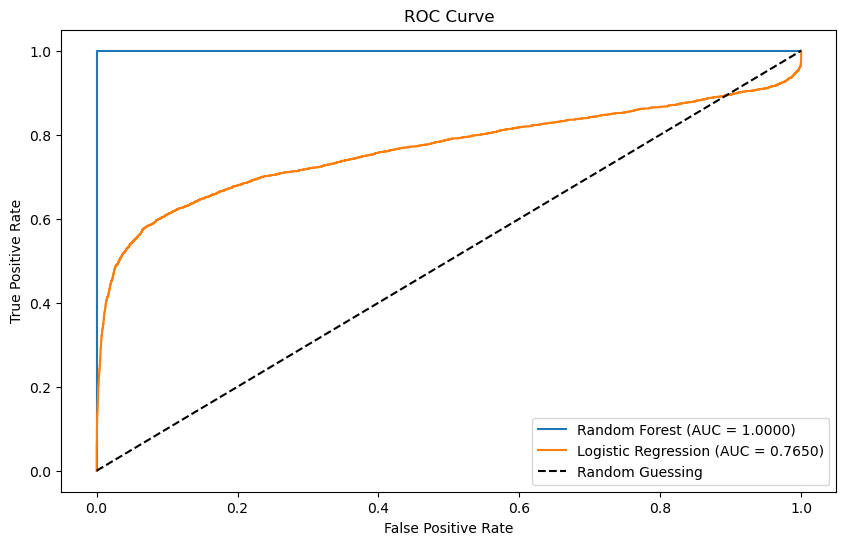

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
 
# 1. Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
 
# 2. Entrenar el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
 
# 3. Predecir probabilidades en el conjunto de prueba para el cálculo de AUC
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
 
# 4. Calcular AUC para Random Forest
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC para Random Forest: {auc_rf:.4f}")
 
# 5. Calcular AUC para Regresión Logística
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"AUC para Regresión Logística: {auc_lr:.4f}")
 
# 6. Graficar las curvas ROC para ambos modelos
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
 
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Los resultados muestran que el modelo de Random Forest tiene un AUC perfecto de 1.0000, mientras que el modelo de Regresión Logística
# tiene un AUC de 0.7650. Esto indica que, según la métrica AUC, el modelo de Random Forest tiene un rendimiento significativamente mejor
# para predecir las clases que el modelo de Regresión Logística.

In [ ]:
"""
Conclusiones

Los modelos de Machine Learning desarrollados, en particular Random Forest, han demostrado una alta precisión en la predicción de incumplimientos 
de préstamos. Después de aplicar técnicas de optimización de hiperparámetros, el modelo de Random Forest alcanzó una precisión del 100% en la 
clasificación de clientes con riesgo de incumplimiento, mientras que el modelo de Regresión Logística, aunque efectivo, obtuvo una precisión más baja.

Durante el análisis, se identificó la necesidad de manejar cuidadosamente los valores nulos y atípicos, ya que la eliminación de datos críticos, 
como el "Status", afectaba la capacidad de los modelos para predecir correctamente. El tratamiento adecuado de estos datos fue fundamental para 
mejorar la calidad de las predicciones.
"""

In [ ]:
"""
Respuesta a la pregunta Inicial

¿Podemos predecir si un cliente incumplirá con el pago de un préstamo basado en sus características financieras y del préstamo?

Sí, es posible predecir con alta precisión los incumplimientos de préstamos utilizando modelos de Machine Learning. Con los datos adecuados y 
las técnicas de optimización correctas, las instituciones financieras pueden anticipar posibles incumplimientos y ajustar sus políticas de riesgo 
crediticio en consecuencia.

"""